In [1]:
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [2]:
data = pd.read_csv('Datasets/albrecht.csv')

In [3]:
X = data[['Input', 'Output', 'Inquiry',	'File', 'FPAdj', 'RawFPcounts',	'AdjFP']]
y = data['Effort']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
param_grid = {
    'kernel': ['linear', 'rbf'],                 # Type of kernel function
    'C': [0.1, 1, 10],                           # Regularization parameter
    'gamma': ['scale', 'auto']                   # Kernel coefficient for 'rbf' kernel
}

In [6]:
# Create an instance of the Random Forest model
svm_model = SVR()

In [7]:
# Perform grid search
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             scoring='neg_mean_squared_error')

In [8]:
# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [9]:
y_pred = best_model.predict(X_test)

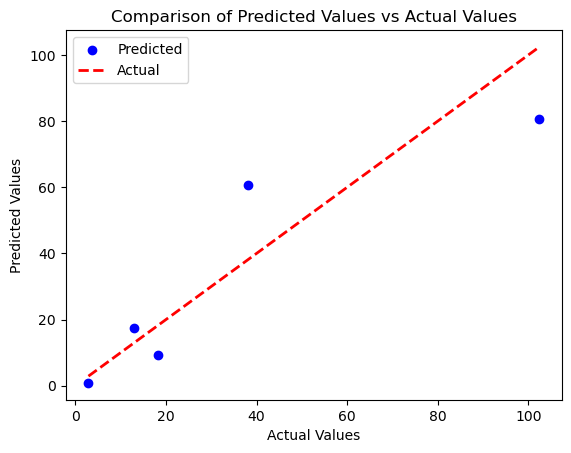

In [10]:
import matplotlib.pyplot as plt

# Assuming you have already trained the SVM regressor and obtained the predicted values 'y_pred'

# Create a scatter plot to compare predicted values with actual values
plt.scatter(y_test, y_pred, color='blue', label='Predicted')

# Add a diagonal line indicating perfect predictions
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Actual')

# Add labels and title to the plot
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Comparison of Predicted Values vs Actual Values')
plt.legend()

# Show the plot
plt.show()

In [11]:
# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Print the evaluation metrics
print("R2 Score:", r2)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("Best Hyperparameters:", best_params)

R2 Score: 0.828463019042137
Mean Squared Error (MSE): 217.85361257150316
Mean Absolute Error (MAE): 11.957477300633645
Mean Absolute Percentage Error (MAPE): 46.81917712299543
Best Hyperparameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}


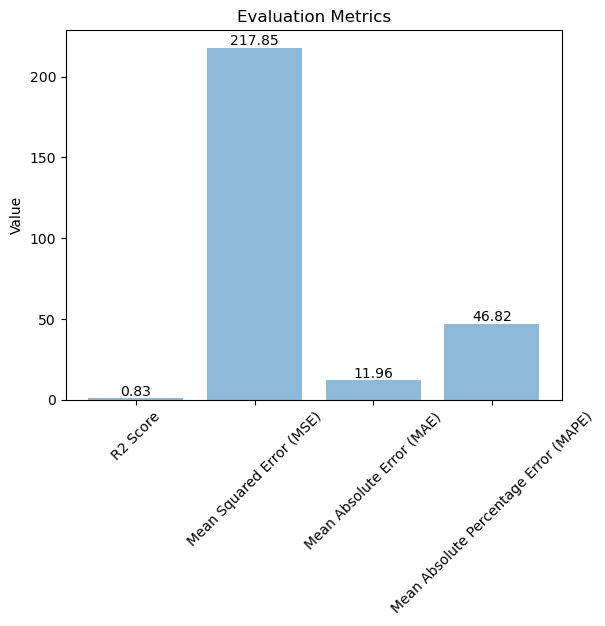

In [12]:
metrics = ['R2 Score', 'Mean Squared Error (MSE)', 'Mean Absolute Error (MAE)', 'Mean Absolute Percentage Error (MAPE)']

# Create a list of evaluation metric values
values = [r2, mse, mae, mape]

# Set the positions of the bars on the x-axis
x_pos = np.arange(len(metrics))

# Create the bar graph
plt.bar(x_pos, values, align='center', alpha=0.5)

# Set the labels for the x-axis and y-axis
plt.xticks(x_pos, metrics, rotation=45)
plt.ylabel('Value')

# Set the title of the graph
plt.title('Evaluation Metrics')

# Display the values on top of each bar
for i, v in enumerate(values):
    plt.text(i, v, str(round(v, 2)), ha='center', va='bottom')

# Show the bar graph
plt.show()